In [1]:
#! CA_CURL_BUNDLE=/ca-certificates.crt pip install polars scikit-learn

In [2]:
import pandas as pd

In [163]:
df = pd.read_csv("data/weight_dataset.csv")

In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV, LassoLars
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt

In [164]:
map = ({"8w": 8, "4w": 4, "2w": 2, "1w": 1, 'control': 8})
df['weeks'] = df['group'].apply(lambda val: map[val])
df['sex']

0       male
1     female
2       male
3       male
4       male
       ...  
66    female
67    female
68    female
69      male
70      male
Name: sex, Length: 71, dtype: object

In [165]:
X = df.drop('norm_mass_lost', axis=1).drop('group', axis=1).drop('weeks', axis=1).drop('sex', axis=1).drop('pid', axis=1)
y = df['norm_mass_lost']/df['weeks']
stratify = df[['group','sex']]
stratify

,group,sex
0,2w,male
1,8w,female
2,control,male
3,4w,male
4,1w,male
...,...,...
66,4w,female
67,1w,female
68,control,female
69,4w,male


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify)

In [167]:
X_train.shape

(56, 22680)

In [169]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
X_train_scaled_imputed = np.nan_to_num(X_train_scaled, nan=0)
X_test_scaled_imputed = np.nan_to_num(X_test_scaled, nan=0)

In [170]:


# Initialize the KNNImputer with desired parameters
imputer = KNNImputer(n_neighbors=3, weights='uniform')

# Fit the imputer and transform the dataset
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.fit_transform(X_test_scaled)


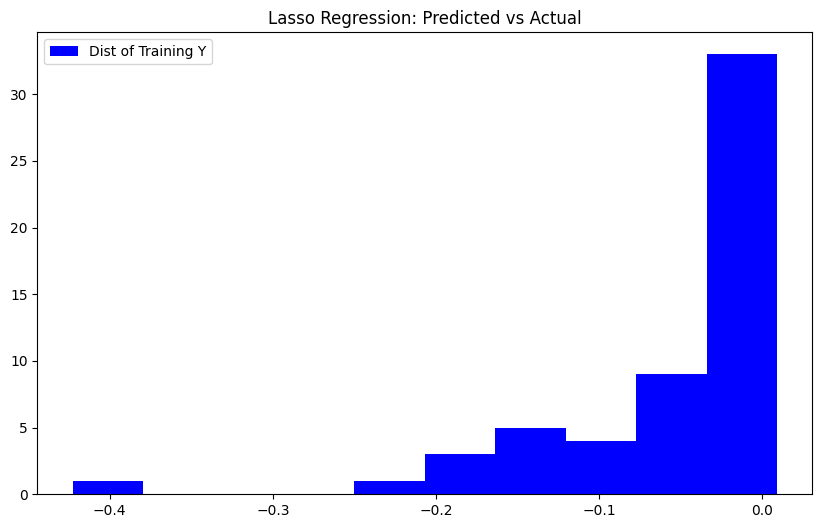

In [171]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, color='blue', label='Dist of Training Y')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()

In [172]:
def mse_for_alpha(alpha):
    lasso = LassoLars(alpha=alpha)
    lasso.fit(X_train_scaled_imputed, y_train)
    y_pred = lasso.predict(X_test_scaled_imputed)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [173]:
alphas = [0.001*i+0.001 for i in range(56)]
mses = [mse_for_alpha(alpha) for alpha in alphas]
[x for x in zip(alphas,mses)]

[(0.001, 0.0039245313144801635),
 (0.002, 0.002846119526180662),
 (0.003, 0.0026543578044167524),
 (0.004, 0.0026261211519201647),
 (0.005, 0.002674100828616258),
 (0.006, 0.002807601647492781),
 (0.007, 0.002913245636353688),
 (0.008, 0.0029720265107269312),
 (0.009000000000000001, 0.0030353964476012444),
 (0.010000000000000002, 0.0030908285492070873),
 (0.011, 0.0031629466004808853),
 (0.012, 0.0032126187654078864),
 (0.013000000000000001, 0.003247847007698326),
 (0.014000000000000002, 0.003276337653776618),
 (0.015, 0.0033012528269917413),
 (0.016, 0.003330139850928828),
 (0.017, 0.0033601835292075832),
 (0.018000000000000002, 0.0033817671207048345),
 (0.019000000000000003, 0.0033949366395570244),
 (0.02, 0.0034115495253149446),
 (0.021, 0.0034316057779785977),
 (0.022000000000000002, 0.0034691637456482367),
 (0.023, 0.003502406417580206),
 (0.024, 0.0035294546748946493),
 (0.025, 0.003552136346482966),
 (0.026000000000000002, 0.0035639791277472365),
 (0.027000000000000003, 0.003564

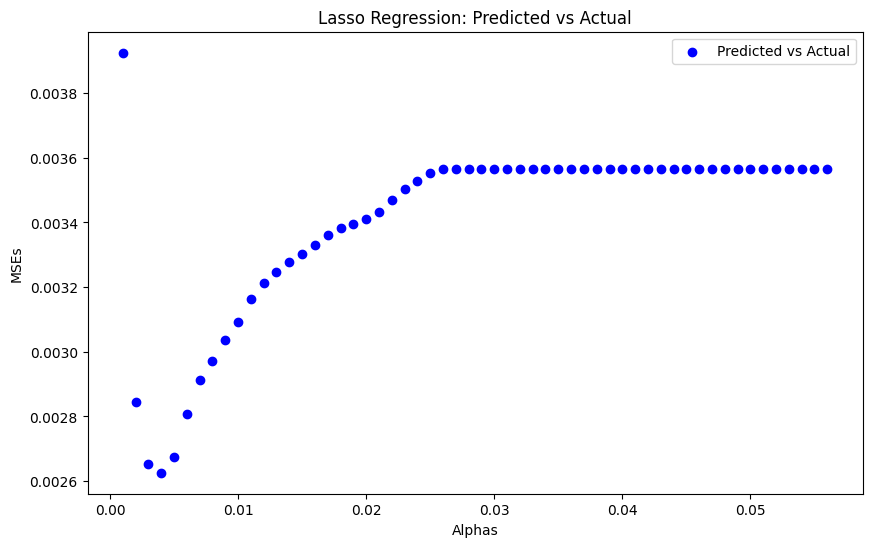

In [174]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(alphas, mses, color='blue', label='Predicted vs Actual')
plt.xlabel('Alphas')
plt.ylabel('MSEs')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()


In [175]:
lasso = LassoLars(alpha=0.004)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled_imputed, y_train)

LassoLars(alpha=0.004)

In [176]:
y_pred = lasso.predict(X_test_scaled_imputed)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0026261211519201647


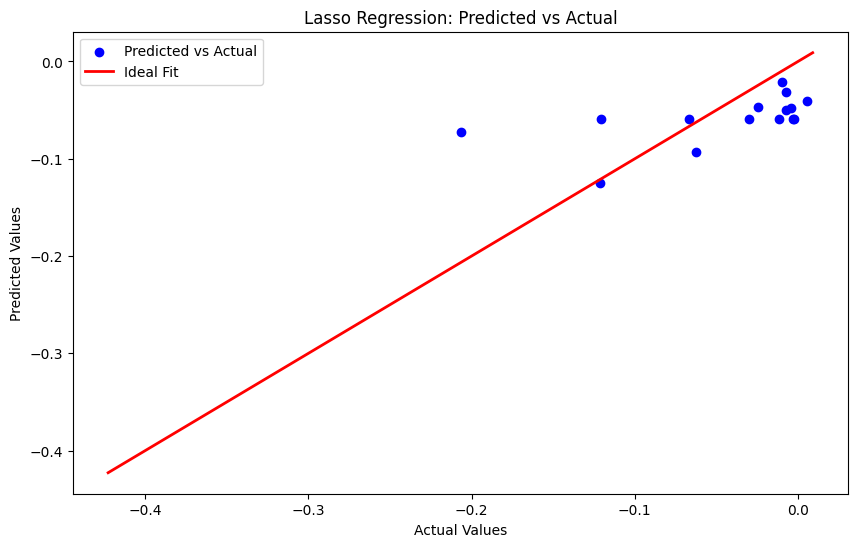

In [177]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual')
plt.legend()
plt.show()

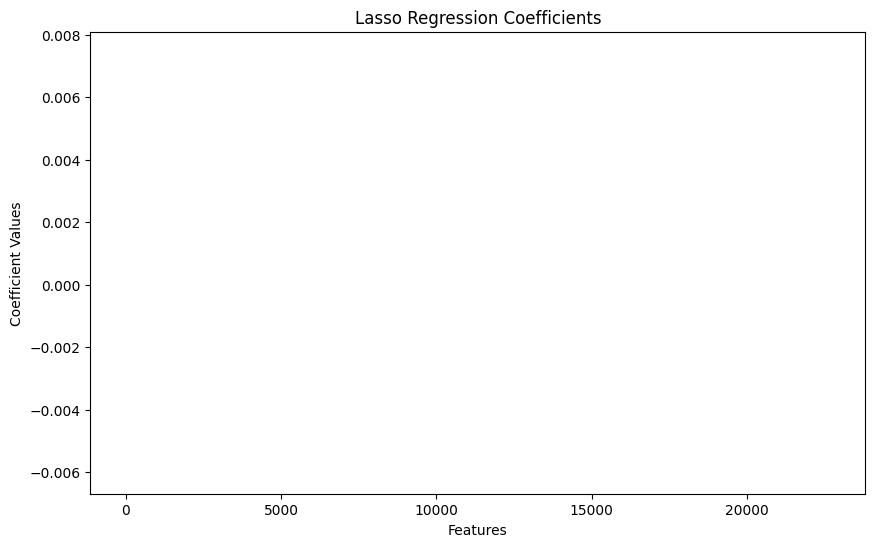

In [178]:
# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Lasso Regression Coefficients')
plt.show()

In [179]:
# Visualize the coefficients
df = pd.Series(lasso.coef_)
df[df > 0].shape

(12,)

In [180]:
df = pd.read_csv("data/weight_dataset.csv")
df = df.drop(["sex", "group", "norm_mass_lost", "pid"], axis=1)

In [181]:
[df.shape, lasso.coef_.size]



[(71, 22680), 22680]

In [184]:
s = pd.Series(lasso.coef_, index=df.columns)
s = s[s > 0]
s

ATAC;LIVER;chr15:9066125-9066786       0.007429
TRNSCRPT;HEART;ENSRNOG00000011647      0.001030
TRNSCRPT;SKM-GN;ENSRNOG00000017417     0.005763
TRNSCRPT;WAT-SC;ENSRNOG00000030449     0.001546
TRNSCRPT;BLOOD;ENSRNOG00000031138      0.002794
ATAC;LIVER;chr9:110294628-110294882    0.004846
TRNSCRPT;CORTEX;ENSRNOG00000046834     0.006765
TRNSCRPT;COLON;ENSRNOG00000047072      0.000992
TRNSCRPT;LUNG;ENSRNOG00000054128       0.000352
TRNSCRPT;LUNG;ENSRNOG00000056184       0.002118
TRNSCRPT;SMLINT;ENSRNOG00000059507     0.003990
TRNSCRPT;BLOOD;ENSRNOG00000060098      0.000507
dtype: float64